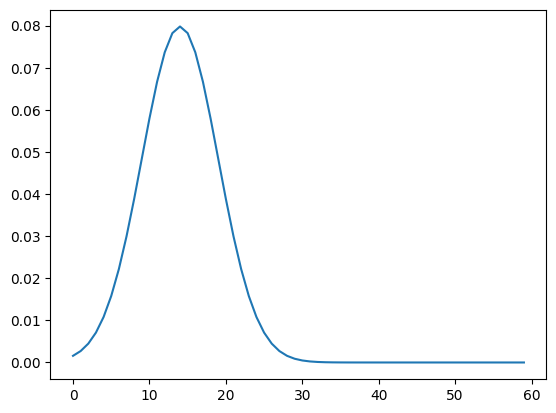

In [42]:
# Code adapted https://www.geeksforgeeks.org/how-to-plot-a-normal-distribution-with-matplotlib-in-python/
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 
  
# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(-0, 60, 1) 
  
# Calculating mean and standard deviation 
mean = 14
sd = 5

y_axis =  norm.pdf(x_axis, mean, sd)

plt.plot(x_axis, y_axis) 
plt.show()

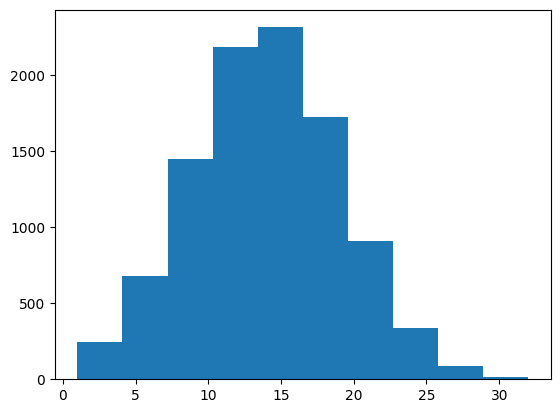

In [43]:
import math 

rows = 10000

waitingTimeColumn = []

for x in range(1,len(x_axis)):
    
    # Number of mocks at targeted year
    n = math.floor(rows * y_axis[x])
    vals = [x] * n
    
    # Adds it to the column for waitingTimeColumn
    waitingTimeColumn.extend(vals) 

plt.hist(waitingTimeColumn)
plt.show()

In [53]:
#https://en.wikipedia.org/wiki/Heap%27s_algorithm

sex = ["m", "f"]
# 
age = [*range(16,70+1)]
minBedSize = [*range(1,5+1)]
maxBedSize = [*range(1,5+1)]
medicalRequirements = ["none", "pregnant", ]
decant = [1 , 0]
ahrCode = [*range(1,7+1)]




[1, 2, 3, 4, 5, 6, 7]


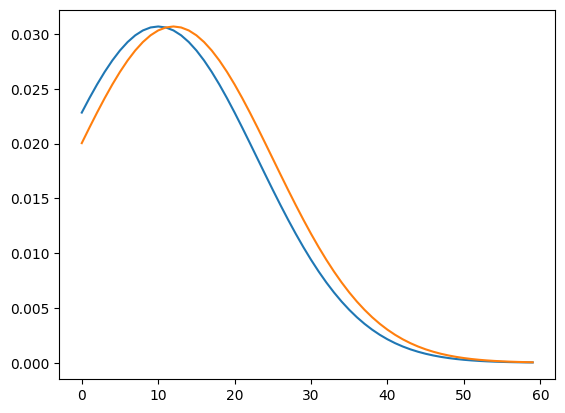

In [66]:
# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(-0, 60, 1) 
  
# Calculating mean and standard deviation 
mean = 10
sd = 13

y_axis =  norm.pdf(x_axis, mean, sd)
y_axis_two =  norm.pdf(x_axis, mean+2, sd)

plt.plot(x_axis, y_axis) 
plt.plot(x_axis, y_axis_two)
plt.show()